<p><font size="6"><b> 02 - Pandas: Basic operations on Series and DataFrames</b></font></p>


> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2017*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [2]:
%matplotlib inline

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.


In [3]:
# redefining the example objects

population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

In [ ]:
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [ ]:
countries.head()

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


# The 'new' concepts

## Elementwise-operations 

Just like with numpy arrays, many operations are element-wise:

In [ ]:
population / 100

Germany           0.813
Belgium           0.113
France            0.643
United Kingdom    0.649
Netherlands       0.169
dtype: float64

In [ ]:
countries['population'] *1000000/ countries['area']

0    370.370370
1     95.783158
2    227.699202
3    406.973944
4    265.092721
dtype: float64

In [ ]:
np.log(countries['population'])

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
Name: population, dtype: float64

which can be added as a new column, as follows:

In [ ]:
countries["log_population"] = np.log(countries['population'])

In [ ]:
countries

,country,population,area,capital,log_population
0,Belgium,11.3,30510,Brussels,2.424803
1,France,64.3,671308,Paris,4.163560
2,Germany,81.3,357050,Berlin,4.398146
3,Netherlands,16.9,41526,Amsterdam,2.827314
4,United Kingdom,64.9,244820,London,4.172848


In [ ]:
countries.columns

Index(['country', 'population', 'area', 'capital', 'log_population'], dtype='object')

In [ ]:
countries[countries['population'] > 40]

,country,population,area,capital,log_population
1,France,64.3,671308,Paris,4.163560
2,Germany,81.3,357050,Berlin,4.398146
4,United Kingdom,64.9,244820,London,4.172848


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>When you have an operation which does NOT work element-wise or you have no idea how to do it directly in Pandas, use the **apply()** function</li>
  <li>A typical use case is with a custom written or a **lambda** function</li>
</ul>
</div>

In [ ]:
countries["population"].head()

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [ ]:
countries["population"].apply(np.log) # but this works as well element-wise...

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
Name: population, dtype: float64

In [ ]:
countries["population"]

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [ ]:
import numpy as np
np.log10(1000)

3.0

In [ ]:
countries["capital"]

0     Brussels
1        Paris
2       Berlin
3    Amsterdam
4       London
Name: capital, dtype: object

In [ ]:
np.log(countries["area"])

0    10.325810
1    13.416983
2    12.785631
3    10.634075
4    12.408279
Name: area, dtype: float64

In [ ]:
countries["capital"]

0     Brussels
1        Paris
2       Berlin
3    Amsterdam
4       London
Name: capital, dtype: object

In [ ]:
countries["population"]

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [ ]:
countries["population"].apply(np.log)

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
Name: population, dtype: float64

In [ ]:
#### Lambda mots clée en python pour signaler à python que vous souhaitez créer votre propre fonction

#lambda x: len(x) #### Application de la fonction len sur l'ensemble des lignes de l'objet


countries["capital"].apply(lambda x: x)

0     Brussels
1        Paris
2       Berlin
3    Amsterdam
4       London
Name: capital, dtype: object

In [ ]:
countries["capital"].apply(lambda x: len(x) )

0    8
1    5
2    6
3    9
4    6
Name: capital, dtype: int64

In [ ]:
#countries[]  # in case you forgot the functionality: countries["capital"].str.len()

In [ ]:
def population_annotater(population):
    """annotate as large or small"""
    if population > 50:
        return 'large'
    else:
        return 'small'

In [ ]:
countries["population"]

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [ ]:
countries["population"].apply(population_annotater) # a custom user function

0    small
1    large
2    large
3    small
4    large
Name: population, dtype: object

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the population numbers relative to Belgium</li>
</ul>
</div>

In [ ]:
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [ ]:
population / population['Belgium']

Germany           7.194690
Belgium           1.000000
France            5.690265
United Kingdom    5.743363
Netherlands       1.495575
dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the population density for each country and add this as a new column to the dataframe.</li>
</ul>
</div>

In [ ]:
countries

,country,population,area,capital,log_population
0,Belgium,11.3,30510,Brussels,2.424803
1,France,64.3,671308,Paris,4.163560
2,Germany,81.3,357050,Berlin,4.398146
3,Netherlands,16.9,41526,Amsterdam,2.827314
4,United Kingdom,64.9,244820,London,4.172848


In [ ]:
countries['density'] = countries['population']*1000000 / countries['area']

0    370.370370
1     95.783158
2    227.699202
3    406.973944
4    265.092721
dtype: float64

In [ ]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,country,population,area,capital,log_population,density
0,Belgium,11.3,30510,Brussels,2.424803,370.370370
1,France,64.3,671308,Paris,4.163560,95.783158
2,Germany,81.3,357050,Berlin,4.398146,227.699202
3,Netherlands,16.9,41526,Amsterdam,2.827314,406.973944
4,United Kingdom,64.9,244820,London,4.172848,265.092721


<div class="alert alert-danger">

**WARNING**: **Alignment!** (unlike numpy)

 <ul>
  <li>Pay attention to **alignment**: operations between series will align on the index:  </li>
</ul> 

</div>

In [ ]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [ ]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [ ]:
s2

France     64.3
Germany    81.3
dtype: float64

In [ ]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

## Aggregations (reductions)

Pandas provides a large set of **summary** functions that operate on different kinds of pandas objects (DataFrames, Series, Index) and produce single value. When applied to a DataFrame, the result is returned as a pandas Series (one value for each column). 

The average population number:

In [ ]:
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [ ]:
population.mean()

47.739999999999995

The minimum area:

In [ ]:
countries['area'].min()

30510

For dataframes, often only the numeric columns are included in the result:

In [ ]:
countries

,country,population,area,capital,log_population,density
0,Belgium,11.3,30510,Brussels,2.424803,370.370370
1,France,64.3,671308,Paris,4.163560,95.783158
2,Germany,81.3,357050,Berlin,4.398146,227.699202
3,Netherlands,16.9,41526,Amsterdam,2.827314,406.973944
4,United Kingdom,64.9,244820,London,4.172848,265.092721


In [ ]:
countries.median()

population            64.300000
area              244820.000000
log_population         4.163560
density              265.092721
dtype: float64

# Application on a real dataset

Reading in the titanic data set...

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("titanic.csv")

Quick exploration first...

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.Survived.sum()

342

In [6]:
df.Survived.sum() #### Nombre de personnes qui a survecue

342

In [7]:
len(df) #### Nombre total d'individu ans le dataset

891

In [8]:
df.Survived.sum()/len(df) * 100

38.38383838383838

In [9]:
df.Survived.mean() 

0.3838383838383838

The available metadata of the titanic data set provides the following information:

VARIABLE   |  DESCRIPTION
------ | --------
survival       | Survival (0 = No; 1 = Yes)
pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name           | Name
sex            | Sex
age            | Age
sibsp          | Number of Siblings/Spouses Aboard
parch          | Number of Parents/Children Aboard
ticket         | Ticket Number
fare           | Passenger Fare
cabin          | Cabin
embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the average age of the passengers?</li>
</ul>

</div>

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df["Age"].mean()

29.69911764705882

In [10]:
df["Age"].mean() #### Age moyen des individus

29.69911764705882

On a un age moyen de 29 ans sur cet ensemble de données

In [16]:
df["Age"].median()  #### Age médian des individus

28.0

Différence entre l'age moyen et l'age median  --> **Présence d'outlier** ie de valeur très grand dans la **variable Age**

In [18]:
df.Age.mean() #### Age moyen des individus

29.69911764705882

In [ ]:
df.Age.mean()

29.69911764705882

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

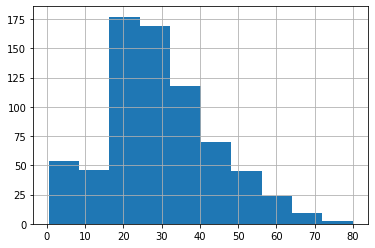

In [21]:
df["Age"].hist()

<AxesSubplot:>

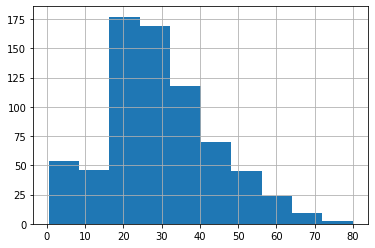

In [22]:
df.Age.hist()

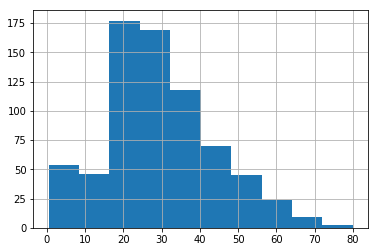

In [ ]:
df['Age'].hist() #bins=30, log=True

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the survival rate? (the relative number of people that survived)</li>
</ul>

Note: the 'Survived' column indicates whether someone survived (1) or not (0).
</div>

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df["Survived"].mean()*100 #### taux de survies gloable de 38.8 %

38.38383838383838

In [30]:
df['Survived'].sum() #### Somme l'ensemble des individus

342

In [29]:
df['Survived'].sum()/len(df)*100 #### taux de survies gloable de 38.8 %

38.38383838383838

In [32]:
df['Survived'].value_counts() #### methode qui fonctionne

0    549
1    342
Name: Survived, dtype: int64

In [28]:
#### Moyenne ie somme des ind / effectif

df['Survived'].sum() #### Ceux qui ont survécue

342

In [ ]:
#### Cob

In [33]:
len(df['Survived'])

891

In [34]:
df['Survived'].sum() / len(df['Survived'])

0.3838383838383838

In [35]:
df['Survived'].mean()

0.3838383838383838

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare? And the median?</li>
</ul>
</div>

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df["Fare"].max() ### prix maximum du ticket

512.3292

In [33]:
df.Fare.max() ### prix maximum du ticket

512.3292

In [34]:
df.Fare.median() #### prix médian du ticket

14.4542

Interprétation:

* 50% des individus qui paient moins de 14,45 dollars

* 50% des individus qui paient plus de 14,45 dollars

In [35]:
df.Fare.min()

0.0

In [36]:
df_gratuit = df[df.Fare ==0] #### Slicing qui paient 0 dollars 
df_gratuit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [37]:
len(df_gratuit)

15

In [39]:
df_gratuit.Age.isna().sum()

8

In [40]:
df_gratuit.shape

(15, 12)

In [41]:
df_gratuit.Age.mean()

35.142857142857146

In [42]:
df_gratuit.Age.isna().sum()/15

0.5333333333333333

In [43]:
df['Fare'].max()

512.3292

In [49]:
df_prix_faible = df[df.Fare <15] #### Slicing qui paient 0 dollars 
df_prix_faible

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [51]:
df_prix_faible.groupby("Pclass").size() ###Distribution des passagé ayant payés moind de 15 $

Pclass
1      6
2     94
3    357
dtype: int64

In [52]:
df['Fare'].median()

14.4542

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the 75th percentile (`quantile`) of the Fare price (Tip: look in the docstring how to specify the percentile)</li>
</ul>
</div>

In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df.describe().loc["75%", "Fare"] ### Avec les méthodes de slicing

31.0

In [59]:
df["Fare"].quantile(0.75) #### 75% percentiel avec la fonction quantile

31.0

In [61]:
df["Fare"].quantile(0.95) #### 95% percentile 

112.07915

Interprétation:

*  **112,04 dollars** le seuil qui correspond au 5% des individus qui ont payer le plus sur le bateau

In [66]:
df["Fare"].quantile(0.98) #### A partir de 211 dollars, on a es 2% des individus qui ont payer le plus

211.33750000000003

Interprétation:

* 2% de mes individus qui paient plus de 211,33 dollars sur le bateau

#### Filter sur les individu qui ont payer plus de 211 dollars


In [78]:
df["Fare"] > 211 #### ??? est ce que la proposition est vrai ???

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [79]:
df[df["Fare"] > 211] #### Crochet --> Sortie ie true 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [69]:
df[df["Fare"] > 211] ### Filtre > 211

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [75]:
len(df[df["Fare"] > 211])### Nombre

20

In [73]:
len(df[df["Fare"] > 212])/len(df) *100

1.7957351290684627

In [77]:
df_2_percent = df[df["Fare"] > 211]
df_2_percent

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [81]:
df_2_percent['Survived'].mean() #### Taux de surive glbale de 70% -- 38.8% global

0.7

In [86]:
df_2_percent.groupby("Sex")["Survived"].mean() ####

Sex
female    1.00
male      0.25
Name: Survived, dtype: float64

Observation:

* 100% de taux de survie pour les femmes
* 25 % pour les hommes

In [94]:
df_2_percent[df_2_percent["Sex"] =="male"].Age.mean() ### Pas l'age ici

34.166666666666664

In [87]:
df['Fare'].quantile(0.75)

31.0

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Calculate the normalized Fares (relative to its mean)</li>
</ul>
</div>

In [54]:
df['Fare'].mean() #### La moyenne des prix

32.204207968574636

In [57]:
df['Fare'].std() ### Ecart type des prix

49.6934285971809

<AxesSubplot:>

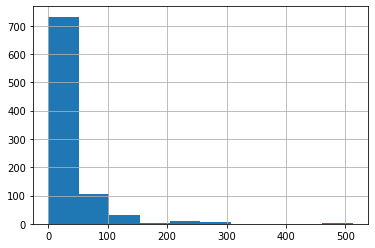

In [56]:
df['Fare'].hist()

In [58]:
#### Normalisation


(df['Fare'] -  df['Fare'].mean())/df['Fare'].std()

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [60]:
#df['Fare']

In [ ]:
(df['Fare'] -  df['Fare'].mean())/df['Fare'].std()

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
5     -0.477848
6      0.395591
7     -0.223957
8     -0.424018
9     -0.042931
10    -0.311997
11    -0.113782
12    -0.486064
13    -0.018699
14    -0.490005
15    -0.326084
16    -0.061964
17    -0.386454
18    -0.285837
19    -0.502666
20    -0.124850
21    -0.386454
22    -0.486483
23     0.066322
24    -0.223957
25    -0.016435
26    -0.502666
27     4.644393
28    -0.489502
29    -0.489167
         ...   
861   -0.416639
862   -0.126274
863    0.751524
864   -0.386454
865   -0.386454
866   -0.369182
867    0.368089
868   -0.456886
869   -0.424018
870   -0.489167
871    0.409511
872   -0.547441
873   -0.466947
874   -0.165096
875   -0.502666
876   -0.449927
877   -0.489167
878   -0.489167
879    1.025369
880   -0.124850
881   -0.489167
882   -0.436426
883   -0.436762
884   -0.506188
885   -0.061964
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891,